# Patients

In [2]:
using Random
using StatsBase
using Pipe
using Plots
using FreqTables
Random.seed!(1234)

MersenneTwister(1234)

In [3]:
population = Dict([
                    ("x", rand(1_000) ),
                    ("y", rand(1_000) ),
                    ("sick", repeat([0], 1000) ),
                    ("immune", repeat([0], 1000) )
                 ])

sick_period = 1;                 

In [4]:
population["immune"] = sample([true false], 1_000);

In [5]:
@pipe sample(1:1_000, 5) |> ( population["sick"][_] .= sick_period ); # 5 ZERO patients

In [6]:
map((x,y)-> if x==sick_period println(y) end,population["sick"], 1:1_000);

143
397
412
728
824


In [7]:
population2 = deepcopy(population)

Dict{String, Vector{T} where T} with 4 entries:
  "immune" => Bool[1, 1, 1, 0, 0, 1, 1, 1, 1, 0  …  1, 1, 1, 0, 1, 1, 1, 1, 0, …
  "sick"   => [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
  "x"      => [0.590845, 0.766797, 0.566237, 0.460085, 0.794026, 0.854147, 0.20…
  "y"      => [0.0987939, 0.430456, 0.786329, 0.0535624, 0.173374, 0.991811, 0.…

In [13]:
anim = @animate  for i∈ 1:50
    
    @pipe population |> plot(_["x"], _["y"],
                                    seriestype=:scatter,
                                    markershapes = map(x -> x>0 ? :star : :circle, _["sick"]),
                                    color = map(x -> x>0 ? :red : :green, _["sick"]),
                                    title="No vaccine (Period=$i)",
                                    legend=false
                                    )

    infecting =  population["sick"] .> 0

    population["sick"] = map(x -> x ≥ 1 ? x-1 : x , population["sick"] )
    
            for α ∈ findall( infecting )
                population["sick"] = @pipe population |> 
                        map( (x,y, sick) -> begin 
                                        if ( x - _["x"][α])^2 + ( y - _["y"][α])^2 ≤ .002 && sick==0 #only healthy people are infected
                                            return sick_period                           
                                        elseif sick > 0
                                            return sick 
                                        else
                                            return 0 # not infected
                                        end
                                    end, _["x"], _["y"], _["sick"])
                                                            
            end

            
end

gif(anim, "anim.gif", fps = 10)                         

┌ Info: Saved animation to 
│   fn = /Users/pytka/Dropbox/My Mac (juprof-vwl06)/Documents/OwnLearning/Marcin_covid/anim.gif
└ @ Plots /Users/pytka/.julia/packages/Plots/SVksJ/src/animation.jl:104


Plots.AnimatedGif("/Users/pytka/Dropbox/My Mac (juprof-vwl06)/Documents/OwnLearning/Marcin_covid/anim.gif")
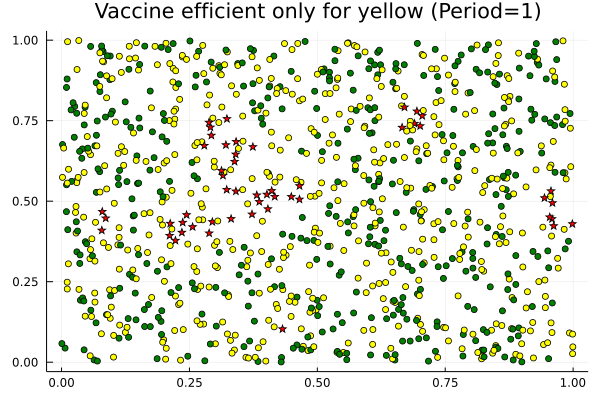

In [12]:
anim = @animate  for i∈ 1:50
    
    @pipe population2 |> plot(_["x"], _["y"],
                                    seriestype=:scatter,
                                    markershapes = map(x -> x>0 ? :star : :circle, _["sick"]),
                                    color = map( (x,immune) -> x>0 ? :red : ( immune==true ? :yellow : :green), _["sick"],  _["immune"]),
                                    title="Vaccine efficient only for yellow (Period=$i)",
                                    legend=false
                                    )
    infecting =  population2["sick"] .> 0
    population2["sick"] = map(x -> x ≥ 1 ? x-1 : x , population2["sick"] )
            for α ∈ findall( infecting )
                population2["sick"] = @pipe population2 |> 
                        map( (x,y, sick, immune ) -> begin 
                                        if ( x - _["x"][α])^2 + ( y - _["y"][α])^2 ≤ .002 && sick==0 && immune == false #only healthy people are infected
                                            return sick_period                           
                                        elseif sick > 0
                                            return sick 
                                        else
                                            return 0 # not infected
                                        end
                                    end, _["x"], _["y"], _["sick"], _["immune"])
                                                            
            end

            
end

gif(anim, "anim.gif", fps = 10)                         

## Infected people in population with no immunity at all

In [10]:

@pipe map( x-> x==1 ? "sick" : "healthy",  population["sick"]) |> freqtable(_)

2-element Named Vector{Int64}
Dim1    │ 
────────┼────
healthy │  21
sick    │ 979

## Infected people in population where only 50% have immunity

In [11]:
@pipe map( x-> x==1 ? "sick" : "healthy",  population2["sick"]) |> freqtable(_)

2-element Named Vector{Int64}
Dim1    │ 
────────┼────
healthy │ 949
sick    │  51